In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Đọc dữ liệu
file_path = "10kmau2018.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9163 entries, 0 to 9162
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9163 non-null   int64  
 1   dantoc           9163 non-null   int64  
 2   tsnguoi          9163 non-null   int64  
 3   thunhap          9163 non-null   float64
 4   chitieu          9163 non-null   float64
 5   chichonangluong  9163 non-null   int64  
 6   chitiendien      9163 non-null   int64  
 7   dienticho        9163 non-null   int64  
 8   chatluongnhao    9163 non-null   int64  
 9   tiepcandienluoi  9163 non-null   int64  
 10  chitiendienbq    9163 non-null   float64
 11  thunhapbq        9163 non-null   float64
 12  chinangluongbq   9163 non-null   float64
 13  chitieubq        9163 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 1002.3 KB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chichonangluong,chitiendien,dienticho,chatluongnhao,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,1,1,4,74821365.0,250986.0,26613,16200,400,3,1,4050.0,1.870534e+07,6653.250000,62746.50000
1,1,1,2,24021504.0,149017.0,27227,21600,300,3,1,10800.0,1.201075e+07,13613.500000,74508.50000
2,1,1,4,12453756.0,150267.0,8351,6000,70,3,1,1500.0,3.113439e+06,2087.750000,37566.75000
3,0,1,5,12009283.0,135265.0,29950,24840,210,3,1,4968.0,2.401857e+06,5990.000000,27053.00000
4,1,1,7,10537178.0,94740.0,42960,35560,250,3,1,5080.0,1.505311e+06,6137.142857,13534.28571


In [5]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

Số lượng giá trị thiếu trong từng cột:
 ttnt               0
dantoc             0
tsnguoi            0
thunhap            0
chitieu            0
chichonangluong    0
chitiendien        0
dienticho          0
chatluongnhao      0
tiepcandienluoi    0
chitiendienbq      0
thunhapbq          0
chinangluongbq     0
chitieubq          0
dtype: int64


In [9]:
# Chọn các biến quan trọng để phân cụm
features = ['chichonangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chichonangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,0.618462,0.421875,1.0,0.114796,0.182979,1.000000,1.000000,0.214286,1.0,0.0,0.195402
1,0.632793,0.562500,1.0,0.306122,0.375410,0.321019,0.642039,0.071429,1.0,0.0,0.145427
2,0.192228,0.156250,1.0,0.042517,0.056757,0.166407,0.166299,0.214286,1.0,0.0,0.030485
3,0.696347,0.646875,1.0,0.140816,0.164643,0.160467,0.128250,0.285714,0.0,0.0,0.100450
4,1.000000,0.926042,1.0,0.143991,0.168711,0.140791,0.080312,0.428571,1.0,0.0,0.120440


In [11]:
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 4


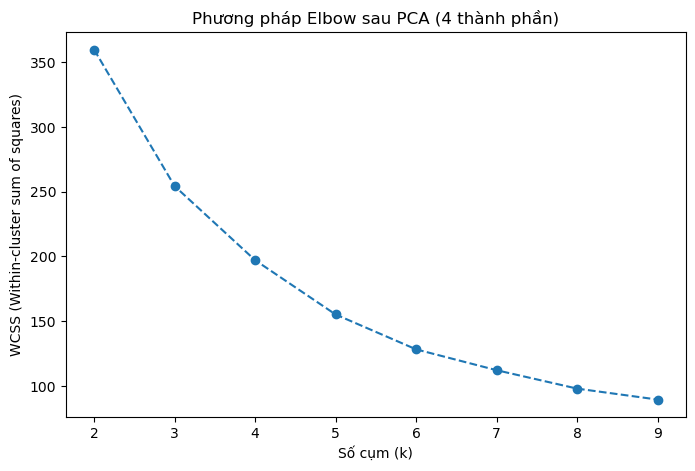

In [13]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

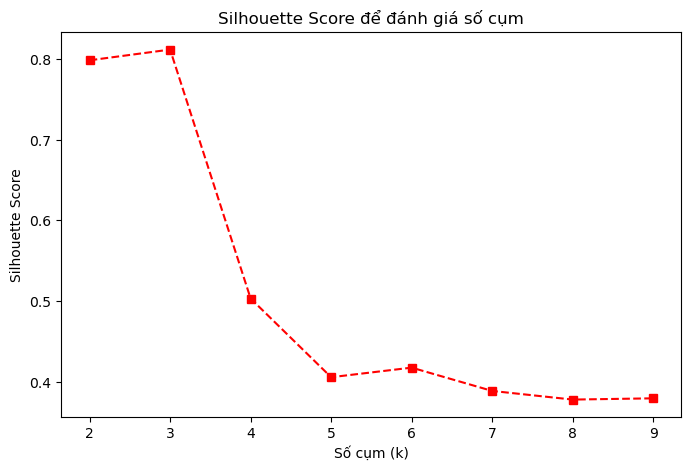

In [15]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [17]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
1    6312
0    2747
2     104
Name: count, dtype: int64


In [19]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chichonangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                                 
0                6714.281398  5198.130688         0.999636    1531.781038   
1                3842.619138  2899.848067         1.000000     874.728243   
2                 822.865385   202.778846         0.000000      94.105449   

             chinangluongbq        thunhap      thunhapbq   tsnguoi  ttnt  \
Cluster_PCA                                                                 
0               1963.070018  498548.297779  139373.823479  3.681835   1.0   
1               1141.291585  270328.626442   74857.161928  3.742079   0.0   
2                251.549018   90018.086538   23946.579812  4.653846   0.0   

               dantoc  dienticho  
Cluster_PCA                       
0            1.364762  97.179469  
1            2.627218  84.371515  
2            9.134615  67.971154  


Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    2747
1    6312
2     104
Name: count, dtype: int64


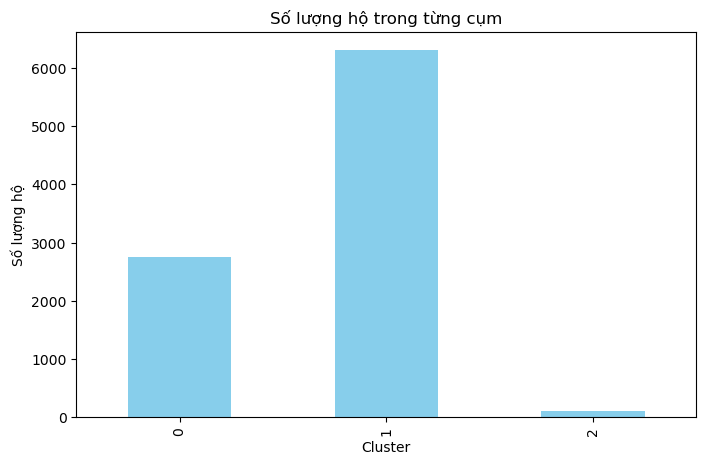

In [21]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                   thunhap      thunhapbq       chitieu     chitieubq
Cluster_PCA                                                          
0            498548.297779  139373.823479  43397.992683  12908.534437
1            270328.626442   74857.161928  28127.465732   8318.254526
2             90018.086538   23946.579812  12297.600962   3250.853545


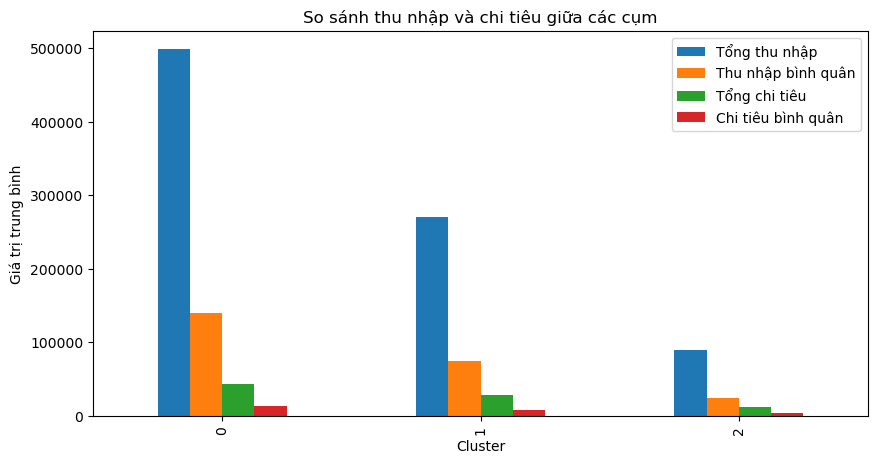

In [25]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chichonangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                             
0                6714.281398     1963.070018  5198.130688    1531.781038
1                3842.619138     1141.291585  2899.848067     874.728243
2                 822.865385      251.549018   202.778846      94.105449


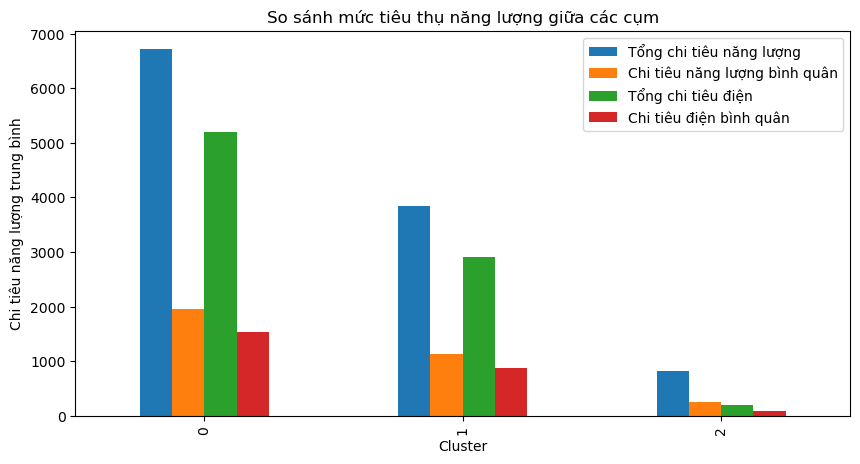

In [27]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chichonangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0     99.963597
1    100.000000
2      0.000000
Name: tiepcandienluoi, dtype: float64


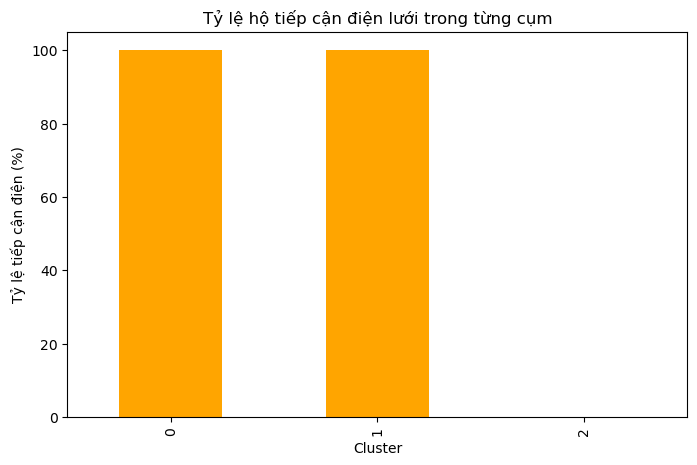

In [29]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0    0.0
1    0.0
2    0.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0      0.0
1    100.0
2    100.0
Name: ttnt, dtype: float64


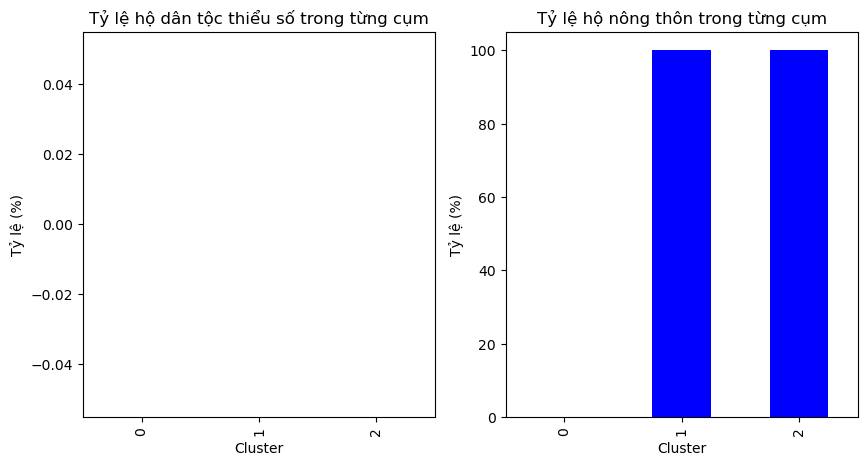

In [31]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            3.681835  97.179469
1            3.742079  84.371515
2            4.653846  67.971154


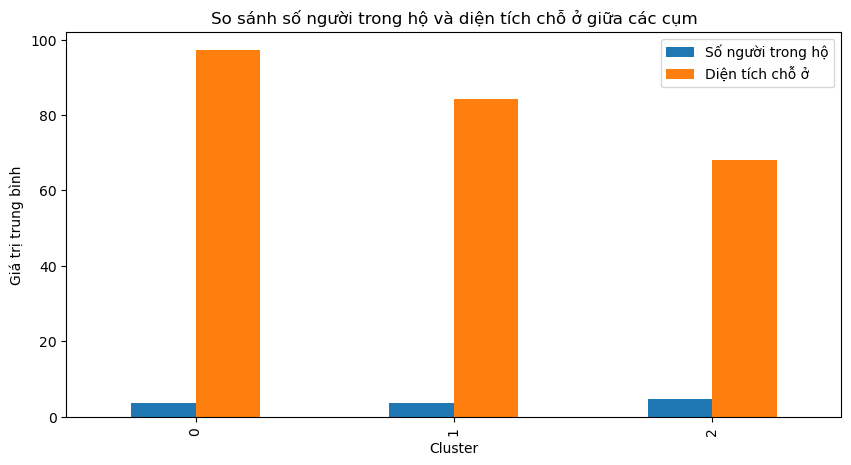

In [33]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()